# Standard Imports

In [89]:
import numpy as np #for numerical computations
import pandas as pd #for dataframes 

import datetime

import missingno as msno #visualizing the missing values

import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import scipy


import warnings #for ignoring the warnings
warnings.filterwarnings("ignore")

In [90]:
data = pd.read_csv("galton-stata11.tab", sep='\t')

In [91]:
data.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0


In [92]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
family,898,197,185,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father,898,NaN,NaN,NaN,69.2329,2.47026,62,68,69,71,78.5
mother,898,NaN,NaN,NaN,64.0844,2.30703,58,63,64,65.5,70.5
gender,898,2,M,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,898,NaN,NaN,NaN,66.7607,3.58292,56,64,66.5,69.7,79
kids,898,NaN,NaN,NaN,6.13586,2.68516,1,4,6,8,15
male,898,NaN,NaN,NaN,0.517817,0.499961,0,0,1,1,1
female,898,NaN,NaN,NaN,0.482183,0.499961,0,0,0,1,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 8 columns):
family    898 non-null object
father    898 non-null float64
mother    898 non-null float64
gender    898 non-null object
height    898 non-null float64
kids      898 non-null int64
male      898 non-null float64
female    898 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 56.2+ KB


In [94]:
data.isna().sum()

family    0
father    0
mother    0
gender    0
height    0
kids      0
male      0
female    0
dtype: int64

In [95]:
typeMapper_default = {
    
    "gender"   : "category",

}

data = data.astype(typeMapper_default)
data.reset_index(drop=True, inplace=True)

In [96]:
data = data.drop(["male", "female"], axis=1)

# Univariate Statistics

### Gender 

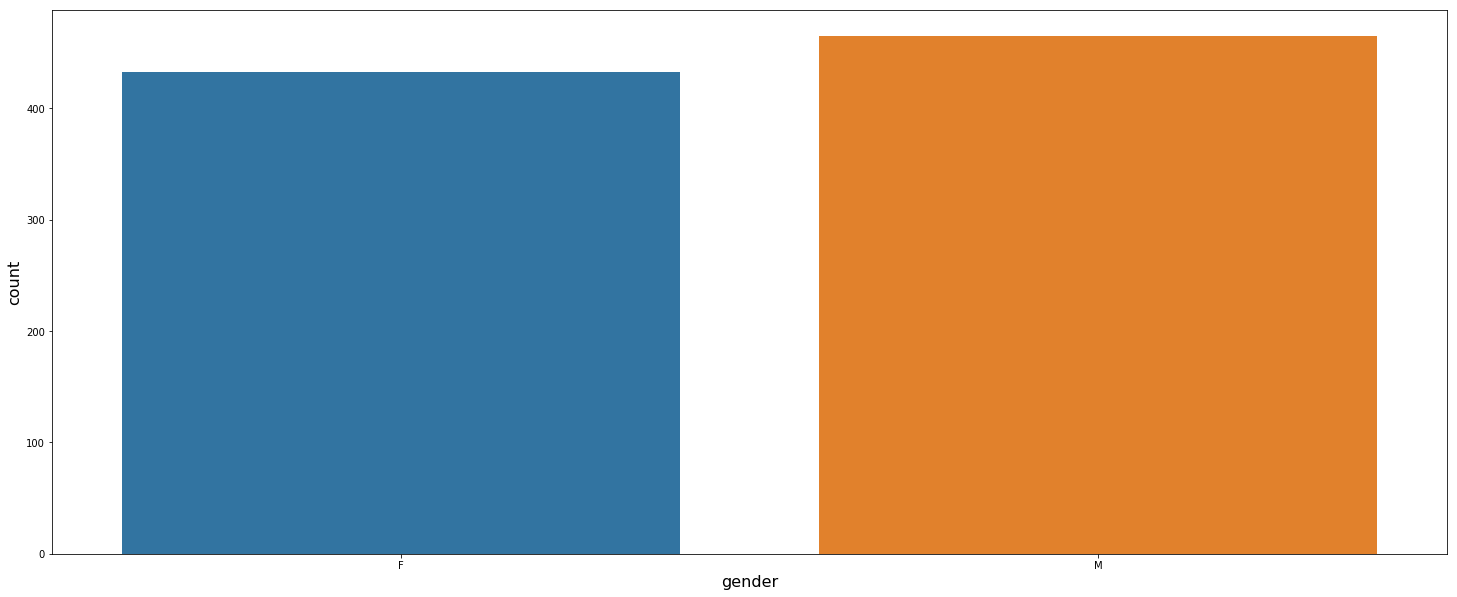

In [97]:
sns.countplot(data["gender"])

### Number of Kids 

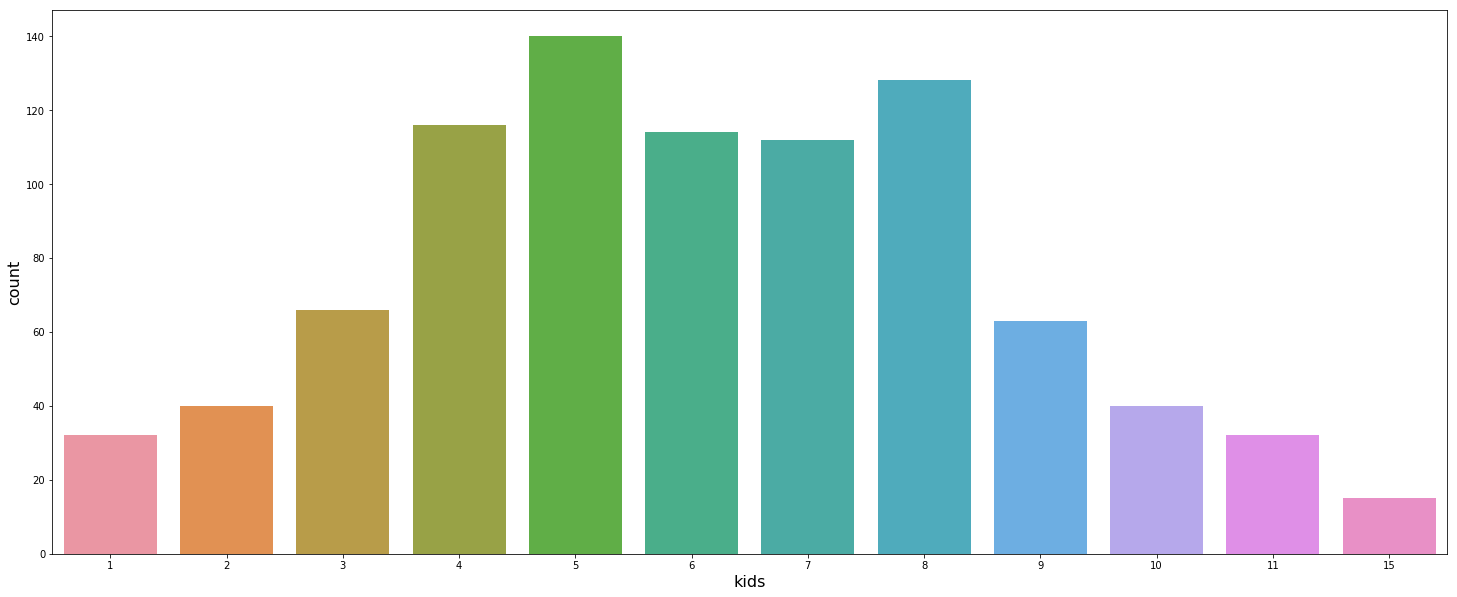

In [98]:
sns.countplot(data["kids"])

### Father

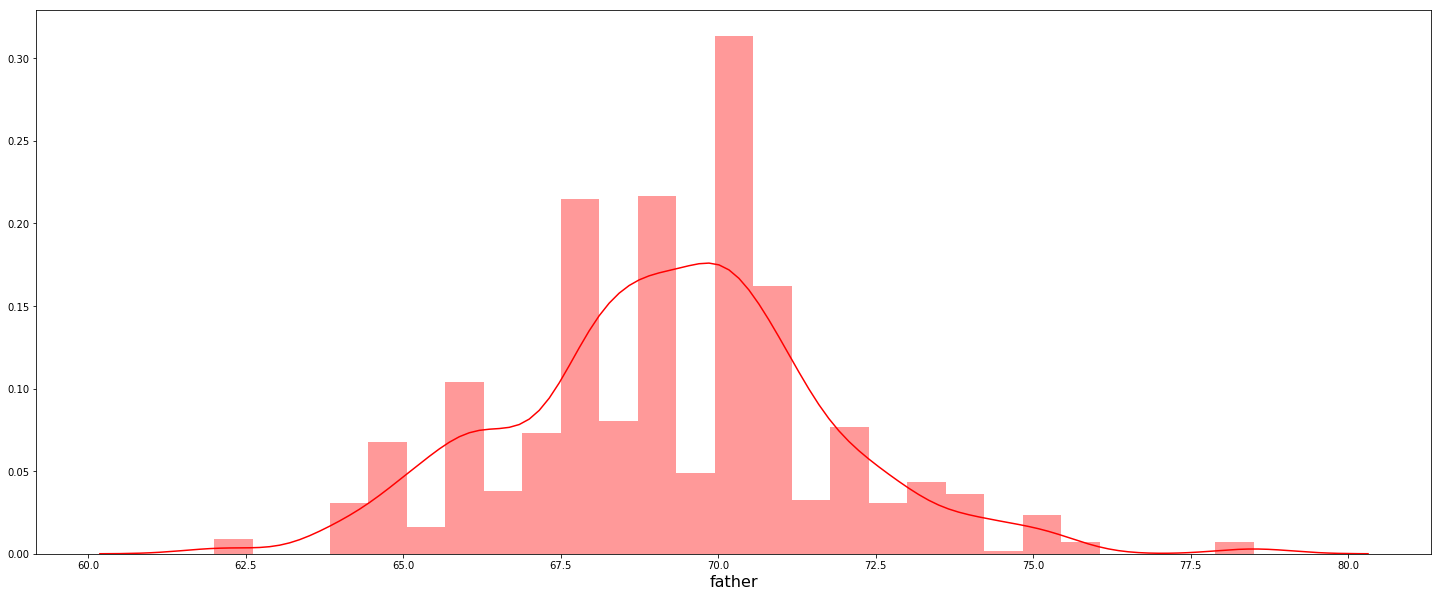

In [99]:
sns.distplot(data["father"], color="red")

### Mother

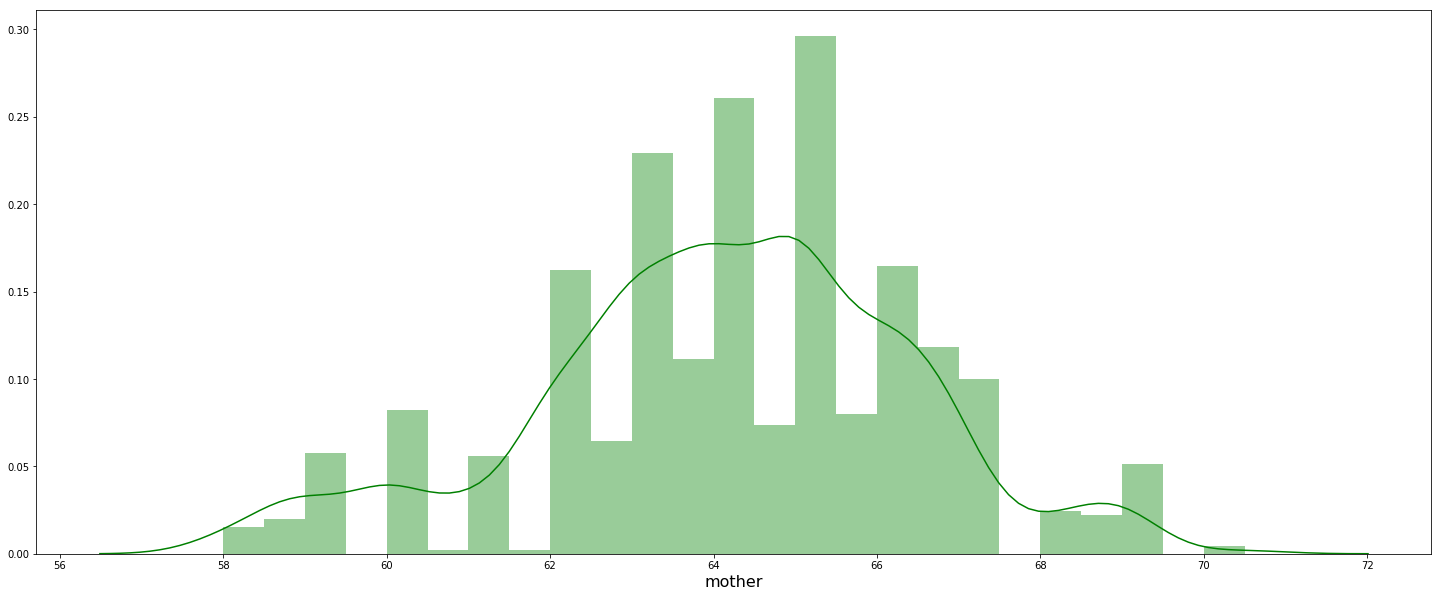

In [100]:
sns.distplot(data["mother"], color="green")

### Height of kids

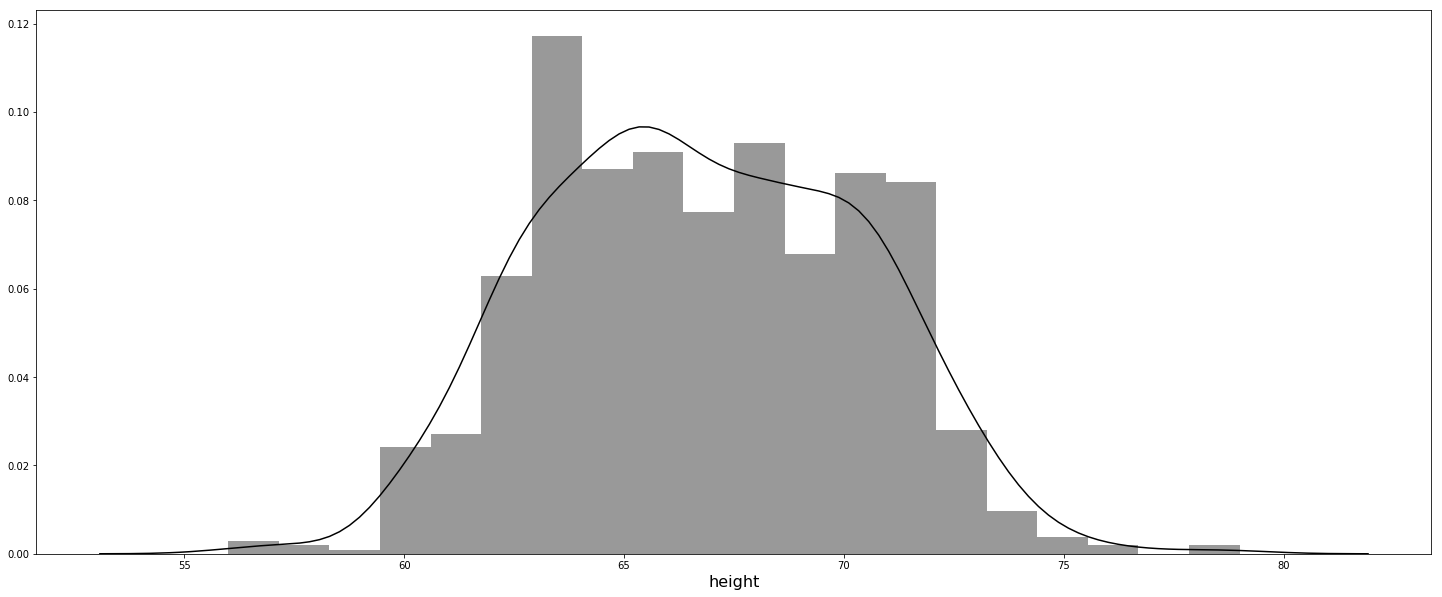

In [101]:
sns.distplot(data["height"], color="black")

# Pair Plot

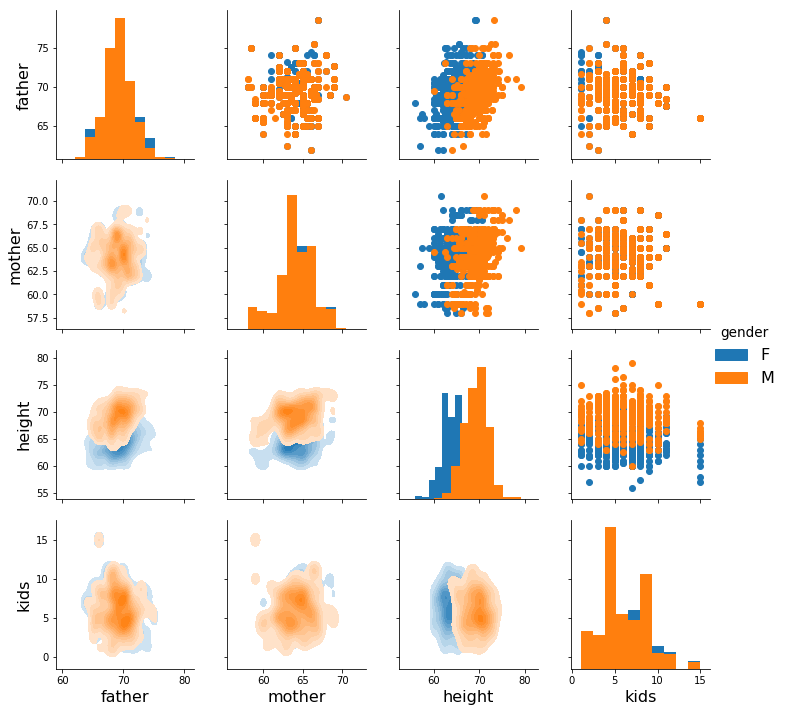

In [102]:
g = sns.PairGrid(data, hue = "gender")
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

# Feature Extraction

In [103]:
data["average_parent_height"] = data[['father', 'mother']].mean(axis=1)

data["interation_parent_height"] = data['father'] * data['mother']


In [104]:
data = data[["family",
             "father",
             "mother",
             "gender",
             "kids",
             "average_parent_height",
             "interation_parent_height",
             "height"]]

In [105]:
mapping = {'M': 0, 'F': 1}
data = data.replace({'gender': mapping})
data.head()

,family,father,mother,gender,kids,average_parent_height,interation_parent_height,height
0,1,78.5,67.0,0,4,72.75,5259.50,73.2
1,1,78.5,67.0,1,4,72.75,5259.50,69.2
2,1,78.5,67.0,1,4,72.75,5259.50,69.0
3,1,78.5,67.0,1,4,72.75,5259.50,69.0
4,2,75.5,66.5,0,4,71.00,5020.75,73.5


# Correlation Matrix

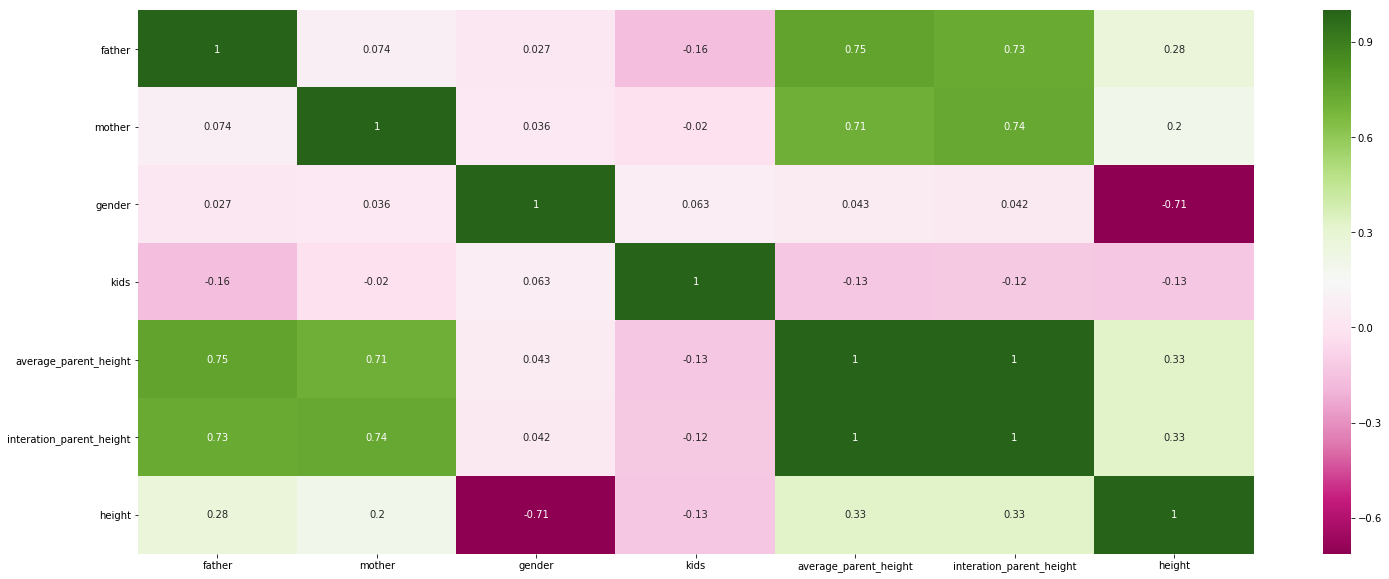

In [64]:
sns.heatmap(data.corr(), cmap="PiYG", annot=True)

# Covariance Matrix

In [19]:
cov = data.cov()

cov

,father,mother,gender,kids,average_parent_height,interation_parent_height,height
father,6.102164,0.419810,0.033529,-1.061436,3.260987,421.249323,2.437090
mother,0.419810,5.322365,0.041082,-0.124078,2.871088,396.296736,1.666856
gender,0.033529,0.041082,0.249961,0.084921,0.037306,4.912343,-1.279464
kids,-1.061436,-0.124078,0.084921,7.210062,-0.592757,-75.449162,-1.220963
average_parent_height,3.260987,2.871088,0.037306,-0.592757,3.066037,408.773030,2.051973
interation_parent_height,421.249323,396.296736,4.912343,-75.449162,408.773030,54604.921909,273.175685
height,2.437090,1.666856,-1.279464,-1.220963,2.051973,273.175685,12.837305


# Eigen Values of Covariance Matrix

In [20]:
cov.apply(pd.to_numeric, errors='coerce')

cov.apply(pd.to_numeric, errors='coerce').fillna(0)

np.linalg.eigvals(cov.apply(pd.to_numeric, errors='coerce').fillna(0))

array([ 5.46155795e+04,  1.18228671e+01,  7.11165515e+00,  5.09011524e+00,
       -5.94212179e-14,  6.09619705e-03,  9.95728028e-02])

# Regression Models

## Regression using StatsModel OLS

In [21]:
X = data["father"]
y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.171e+05
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        12:29:35   Log-Likelihood:                -1838.3
No. Observations:                 673   AIC:                             3679.
Df Residuals:                     672   BIC:                             3683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.9643      0.002    465.980      0.000       0.960       0.968
==============================================================================
Omnibus:                       14.740   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.125
Skew:                           0.017   Prob(JB):                       0.0172
Kurtosis:                       2.463   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
scipy.stats.pearsonr(y_test, predictions)

(0.21900213767998106, 0.0009431043147519005)

In [23]:
X = data["mother"]
y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.901e+05
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        12:29:35   Log-Likelihood:                -1882.8
No. Observations:                 673   AIC:                             3768.
Df Residuals:                     672   BIC:                             3772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mother         1.0412      0.002    436.041      0.000       1.036       1.046
==============================================================================
Omnibus:                        5.191   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.819
Skew:                           0.028   Prob(JB):                        0.148
Kurtosis:                       2.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
scipy.stats.pearsonr(y_test, predictions)

(0.23879101876531444, 0.0003011112587235323)

In [25]:
X = data[["father", "mother"]]
y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        12:29:35   Log-Likelihood:                -1786.4
No. Observations:                 673   AIC:                             3577.
Df Residuals:                     671   BIC:                             3586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.5647      0.038     14.918      0.000       0.490       0.639
mother         0.4322      0.041     10.572      0.000       0.352       0.512
==============================================================================
Omnibus:                       36.513   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.249
Skew:                           0.094   Prob(JB):                     0.000488
Kurtosis:                       2.287   Cond. No.                         39.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
scipy.stats.pearsonr(y_test, predictions)

(0.29073434946459153, 9.29936051001517e-06)

In [27]:
X = data[["father",
          "mother",
          "gender",
          "kids",
          "average_parent_height",
          "interation_parent_height"]]

y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.307e+05
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        12:29:35   Log-Likelihood:                -1466.2
No. Observations:                 673   AIC:                             2942.
Df Residuals:                     668   BIC:                             2965.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
father                       0.5065      0.028     18.220      0.000       0.452       0.561
mother                       0.4000      0.031     12.872      0.000       0.339       0.461
gender                      -5.2700      0.166    -31.738      0.000      -5.596      -4.944
kids                        -0.0341      0.031     -1.092      0.275      -0.096       0.027
average_parent_height        0.4533      0.016     28.208      0.000       0.422       0.485
interation_parent_height    -0.0048      0.001     -6.765      0.000      -0.006      -0.003
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.840
Skew:                          -0.019   Prob(JB):                        0.242
Kurtosis:                       3.316   Cond. No.                     2.01e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
scipy.stats.pearsonr(y_test, predictions)

(0.7784110808195067, 5.521244462675997e-47)

## Regression using Scikit Learn

### Regression Model with Father's height as the predictor - Scikit Learn

In [29]:
X = data["father"]
y = data["height"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_train_new = X_train.as_matrix(columns=None)
X_train_new = X_train_new.reshape(-1,1)

X_test_new = X_test.as_matrix(columns=None)
X_test_new = X_test_new.reshape(-1,1)

In [31]:
model = LinearRegression()

model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)

r2_score(y_test, y_pred)

0.041313375962950816

In [32]:
scipy.stats.pearsonr(y_test, y_pred)

(0.21900213767998106, 0.0009431043147519005)

### Regression Model with all the predictors - Scikit Learn 

In [33]:
X = data[["father",
          "mother",
          "gender",
          "kids",
          "average_parent_height",
          "interation_parent_height"]]

y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.6025518744563512

In [34]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7778536424803327, 7.060361563936255e-47)

# Standardizing the Data

In [35]:
X_standard_scaled = data.drop(["family","height"], axis=1)

y = data["height"]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X_standard_scaled), columns = data.columns.values.tolist()[2:8])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

# Random Forest Regressor

In [37]:
# Importing the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score

# Evaluating model's area under curve ROC
from sklearn.metrics import r2_score, accuracy_score

In [38]:
rf = RandomForestRegressor()

In [39]:
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

y_hat = rf.predict(X_test)

0.5602108648531128


In [40]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7703615945379952, 1.7974990795958943e-45)

# Deep Neural Network

In [41]:
# Keras and TensorFlow imports for Deep Learning
import keras
import tensorflow as tf

# Using keras with a Scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

# for defining the Neural-net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [42]:
def reg_model(learn_rate = 0.01):
    network = keras.models.Sequential()
    layer_1 = Dense(512, input_shape = (X_train.shape[1],), activation="relu")
    layer_2 = Dense(512, activation="tanh")
    layer_3 = Dense(512, activation="tanh")
    layer_4 = Dense(1)
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    network.add(Dropout(0.2))
    network.add(layer_3)
    network.add(Dropout(0.2))
    network.add(layer_4)
    network.compile(loss = "mean_squared_error",
                    optimizer = "adam",
                    metrics = ["mse"])
    return network

In [43]:
epochs = 500
batch_size = 32
mlpModel = KerasRegressor(reg_model, epochs=epochs, batch_size=batch_size, verbose=1)
mlpModel.fit(X_train, y_train)
y_hat = mlpModel.predict(X_test)
rsquared  = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
print(f"Model coefficient of determination, R^2={rsquared}")
print(f"MSE: {mse}")

Epoch 1/500
673/673 [==============================] - 1s 2ms/step - loss: 2240.9876 - mean_squared_error: 2240.9876
Epoch 2/500
673/673 [==============================] - 0s 312us/step - loss: 608.1372 - mean_squared_error: 608.1372
Epoch 3/500
673/673 [==============================] - 0s 312us/step - loss: 225.6461 - mean_squared_error: 225.6461
Epoch 4/500
673/673 [==============================] - 0s 311us/step - loss: 73.0134 - mean_squared_error: 73.0134
Epoch 5/500
673/673 [==============================] - 0s 306us/step - loss: 26.6460 - mean_squared_error: 26.6460
Epoch 6/500
673/673 [==============================] - 0s 307us/step - loss: 18.3650 - mean_squared_error: 18.3650
Epoch 7/500
673/673 [==============================] - 0s 304us/step - loss: 15.7578 - mean_squared_error: 15.7578
Epoch 8/500
673/673 [==============================] - 0s 308us/step - loss: 15.2759 - mean_squared_error: 15.2759
Epoch 9/500
673/673 [==============================] - 0s 313us/step - los

673/673 [==============================] - 0s 342us/step - loss: 7.0445 - mean_squared_error: 7.0445
Epoch 143/500
673/673 [==============================] - 0s 345us/step - loss: 7.2948 - mean_squared_error: 7.2948
Epoch 144/500
673/673 [==============================] - 0s 356us/step - loss: 7.3346 - mean_squared_error: 7.3346
Epoch 145/500
673/673 [==============================] - 0s 350us/step - loss: 6.9950 - mean_squared_error: 6.9950
Epoch 146/500
673/673 [==============================] - 0s 320us/step - loss: 8.0149 - mean_squared_error: 8.0149
Epoch 147/500
673/673 [==============================] - 0s 350us/step - loss: 7.4099 - mean_squared_error: 7.4099
Epoch 148/500
673/673 [==============================] - 0s 341us/step - loss: 7.9092 - mean_squared_error: 7.9092
Epoch 149/500
673/673 [==============================] - 0s 336us/step - loss: 7.6621 - mean_squared_error: 7.6621
Epoch 150/500
673/673 [==============================] - 0s 358us/step - loss: 7.3474 - mean_s

673/673 [==============================] - 0s 364us/step - loss: 7.0577 - mean_squared_error: 7.0577
Epoch 285/500
673/673 [==============================] - 0s 349us/step - loss: 7.4969 - mean_squared_error: 7.4969
Epoch 286/500
673/673 [==============================] - 0s 355us/step - loss: 6.9830 - mean_squared_error: 6.9830
Epoch 287/500
673/673 [==============================] - 0s 346us/step - loss: 7.4095 - mean_squared_error: 7.4095
Epoch 288/500
673/673 [==============================] - 0s 343us/step - loss: 6.9318 - mean_squared_error: 6.9318
Epoch 289/500
673/673 [==============================] - 0s 361us/step - loss: 7.1658 - mean_squared_error: 7.1658
Epoch 290/500
673/673 [==============================] - 0s 361us/step - loss: 7.0451 - mean_squared_error: 7.0451
Epoch 291/500
673/673 [==============================] - 0s 361us/step - loss: 7.0603 - mean_squared_error: 7.0603
Epoch 292/500
673/673 [==============================] - 0s 349us/step - loss: 6.9763 - mean_s

673/673 [==============================] - 0s 377us/step - loss: 6.5779 - mean_squared_error: 6.5779
Epoch 427/500
673/673 [==============================] - 0s 331us/step - loss: 6.6154 - mean_squared_error: 6.6154
Epoch 428/500
673/673 [==============================] - 0s 335us/step - loss: 7.1167 - mean_squared_error: 7.1167
Epoch 429/500
673/673 [==============================] - 0s 477us/step - loss: 6.8462 - mean_squared_error: 6.8462
Epoch 430/500
673/673 [==============================] - 0s 486us/step - loss: 7.6100 - mean_squared_error: 7.6100
Epoch 431/500
673/673 [==============================] - 0s 452us/step - loss: 6.4770 - mean_squared_error: 6.4770
Epoch 432/500
673/673 [==============================] - 0s 472us/step - loss: 5.9903 - mean_squared_error: 5.9903
Epoch 433/500
673/673 [==============================] - 0s 332us/step - loss: 6.5974 - mean_squared_error: 6.5974
Epoch 434/500
673/673 [==============================] - 0s 364us/step - loss: 7.1503 - mean_s

In [44]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7654457565404533, 1.4074180527311324e-44)

# Kernel Principal Component Analysis

In [45]:
from sklearn.decomposition import PCA, KernelPCA

X_standard_scaled = data.drop(["family","height"], axis=1)

y = data["height"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X_standard_scaled), columns = data.columns.values.tolist()[2:8])

In [46]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=5)

X_pca_5 = pca.fit_transform(X_back)

principal_X_pca_5 = pd.DataFrame(data = X_pca_5, columns=['principal component 1', 
                                                          'principal component 2',
                                                          'principal component 3', 
                                                          'principal component 4',
                                                          'principal component 5'])

### Linear Regression with 3 principal components as predictors

In [47]:
X = principal_X_pca_5

y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.6029509751979543

In [48]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7778263880971741, 7.145624497382079e-47)

### Scree Plot

In [49]:
explained_variance = np.var(X_pca_5, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

var1 = [np.cumsum(explained_variance_ratio)]
var1_new= var1[0].tolist()

N = [1,2,3,4,5]

PCA_table = pd.DataFrame(np.column_stack([N,var1_new]),columns = ['N', 'Cumulative_Variance'])

PCA_table

,N,Cumulative_Variance
0,1.0,0.512938
1,2.0,0.703581
2,3.0,0.862907
3,4.0,0.999926
4,5.0,1.000000


Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

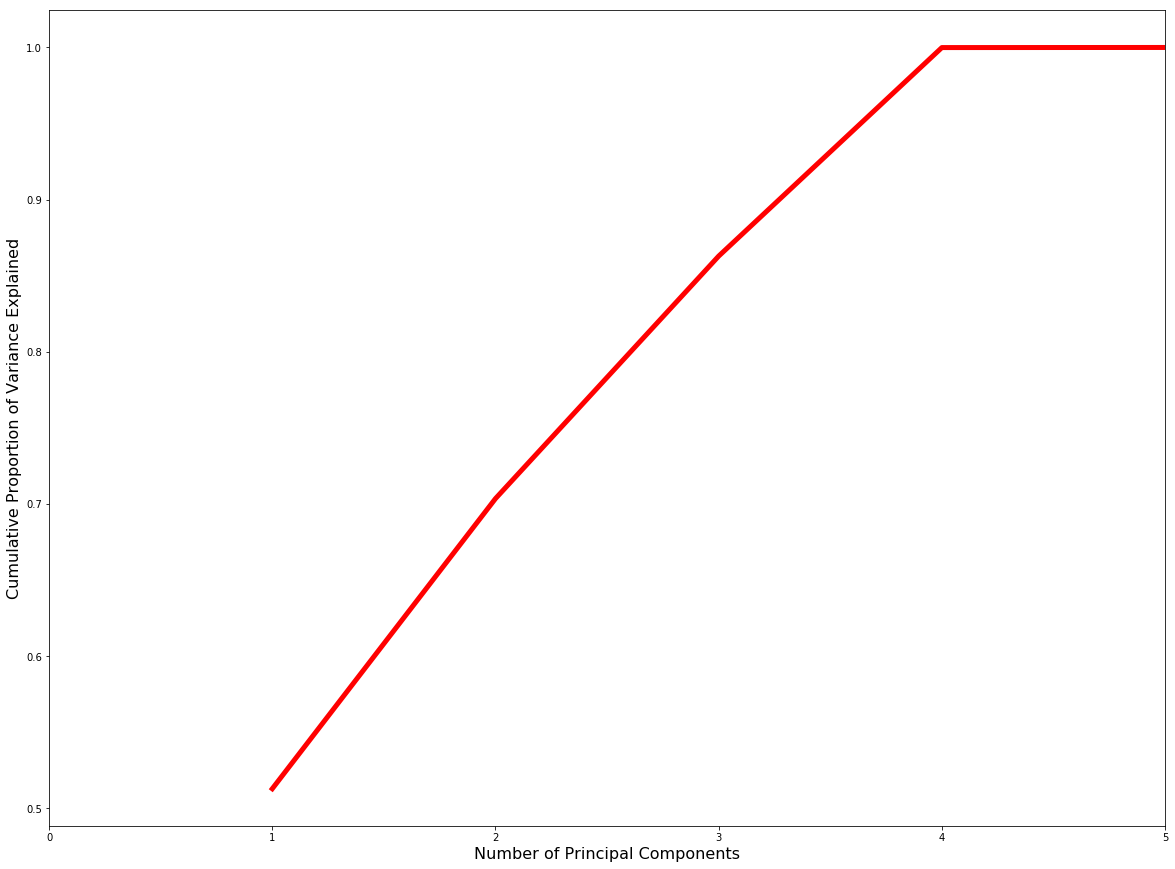

In [50]:
#Scree Plot

plt.rcParams["figure.figsize"] = "20,15"
plt.plot(PCA_table.N, PCA_table.Cumulative_Variance , linewidth = 5, c = "red")

plt.xlabel("Number of Principal Components")
plt.xlim(0,5)
plt.ylabel("Cumulative Proportion of Variance Explained")

### K-PCA with 3 Principal Components 

In [51]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)

In [52]:
explained_variance = np.var(X_pca_3, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

explained_variance_ratio

np.cumsum(explained_variance_ratio)

array([0.59443078, 0.81536134, 1.        ])

In [53]:
principal_X_pca_3 = pd.DataFrame(data=X_pca_3, columns=['principal component 1', 
                                                        'principal component 2',
                                                        'principal component 3'])


<function matplotlib.pyplot.show(*args, **kw)>

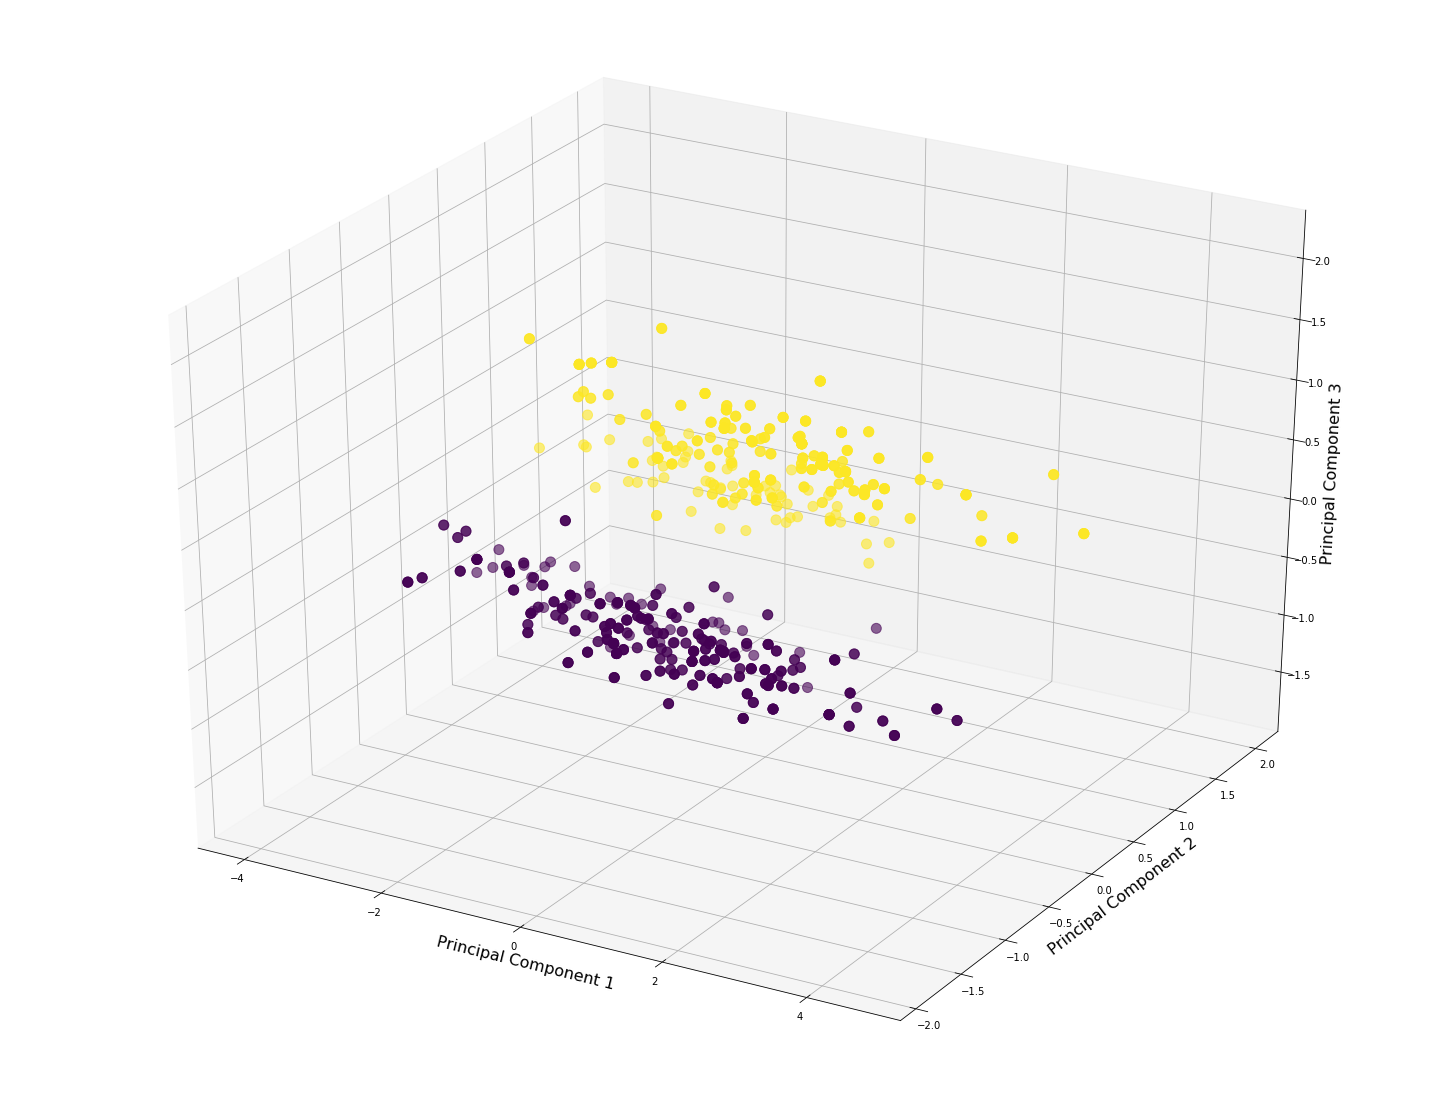

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(principal_X_pca_3.iloc[:,0],
             principal_X_pca_3.iloc[:,1],
             principal_X_pca_3.iloc[:,2], c = data.gender, s = 100, alpha=0.6)

axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show

### Linear Regression with 3 principal components as predictors

In [55]:
X = principal_X_pca_3

y = data["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.6002800533054835

In [56]:
scipy.stats.pearsonr(y_test, y_hat)

(0.7750936030340139, 2.3607236209841255e-46)

In [117]:
data_male = data[data["gender"]== 0]
data_female = data[data["gender"]== 1]

In [118]:
X = data_male[["father",
               "mother",
               "kids",
               "average_parent_height",
               "interation_parent_height"]]

y = data_male["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.2517749501853823

In [119]:
scipy.stats.pearsonr(y_test, y_hat)

(0.5101028776552984, 7.748678094220116e-17)

In [115]:
X = data_female[["father",
               "mother",
               "kids",
               "average_parent_height",
               "interation_parent_height"]]

y = data_female["height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.2632802709182679

In [116]:
scipy.stats.pearsonr(y_test, y_hat)

(0.521257752580183, 1.6244028783513854e-16)

In [135]:
X_standard_scaled = data_male.drop(["family","height"], axis=1)

y = data_male["height"]

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X_standard_scaled), columns = data.columns.values.tolist()[2:8])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

In [137]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_standard_scaled)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA(n_components=3)

X_pca_3 = pca.fit_transform(X_back)

In [138]:
principal_X_pca_3_male = pd.DataFrame(data=X_pca_3, columns=['principal component 1', 
                                                        'principal component 2',
                                                        'principal component 3'])

In [139]:
X_pca_3_male = principal_X_pca_3_male

y = data_male["height"]

X_train, X_test, y_train, y_test = train_test_split(X_pca_3_male, y, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2_score(y_test, y_hat)

0.21856340590682544

In [140]:
scipy.stats.pearsonr(y_test, y_hat)

(0.48632719662786456, 2.713396350798928e-08)